In [2]:
import pandas as pd

df = pd.read_csv('/content/sample_data/income.csv')
display(df.head())
display(df.info())

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   fnlwgt          48842 non-null  int64
 2   education_num   48842 non-null  int64
 3   capital_gain    48842 non-null  int64
 4   capital_loss    48842 non-null  int64
 5   hours_per_week  48842 non-null  int64
 6   income_level    48842 non-null  int64
dtypes: int64(7)
memory usage: 2.6 MB


None

In [3]:
y = df['income_level']
X = df.drop('income_level', axis=1)

print(X.shape)
print(y.shape)

(48842, 6)
(48842,)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39073, 6)
(9769, 6)
(39073,)
(9769,)


In [5]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=10)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=10)

In [6]:
from sklearn.metrics import accuracy_score

y_pred = ada_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of AdaBoost classifier with 10 estimators: {accuracy}")

Accuracy of AdaBoost classifier with 10 estimators: 0.8182004299314157


In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

accuracy_scores = []
estimators = []

for n_estimator in range(10, 201, 10):
    ada_model = AdaBoostClassifier(n_estimators=n_estimator)
    ada_model.fit(X_train, y_train)
    y_pred = ada_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    estimators.append(n_estimator)

optimal_n_estimators = estimators[accuracy_scores.index(max(accuracy_scores))]
print(f"Optimal number of estimators: {optimal_n_estimators}")
print(f"Accuracy with optimal estimators: {max(accuracy_scores)}")

Optimal number of estimators: 80
Accuracy with optimal estimators: 0.8334527587265841


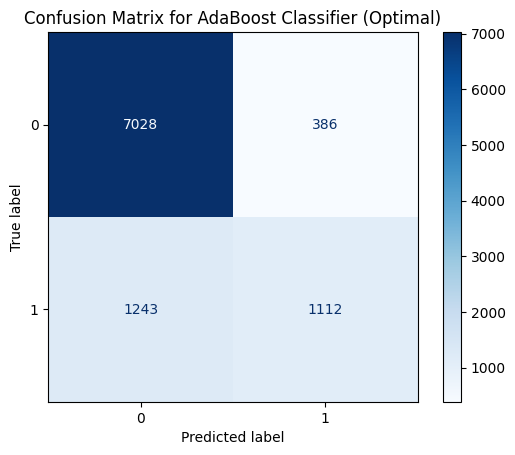

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for AdaBoost Classifier (Optimal)')
plt.show()